<h1>Machine Learning For Regression</h1>

In [1]:
import pandas as pd
import numpy as np

<h1>Data Preparation</h1>

In [2]:
#data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [3]:
#!wget $data

In [4]:
pd.read_csv('data.csv')

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


<h1>Exploratory Data Analysis & Preprocessing</h1>

In [5]:
df = pd.read_csv('data.csv')

In [6]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_') 

In [8]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [9]:
df.dtypes[df.dtypes == 'object'].index

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [10]:
strings = list(df.dtypes[df.dtypes == 'object'].index)

In [11]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [12]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [13]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [14]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [15]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5]) 
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot: xlabel='msrp', ylabel='Count'>

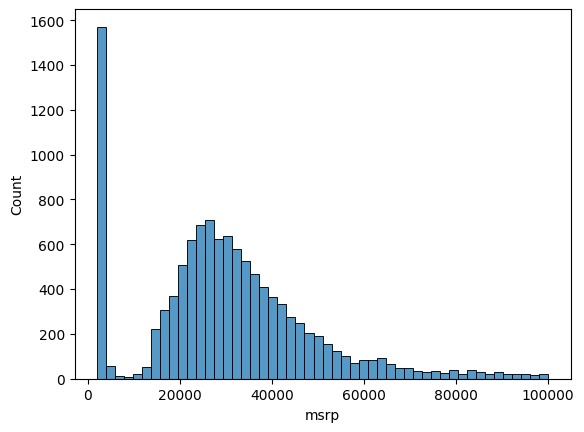

In [17]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

In [18]:
np.log1p([0, 1, 10, 1000, 100000])   

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [19]:
price_logs = np.log1p(df.msrp)

In [20]:
price_logs 

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<AxesSubplot: >

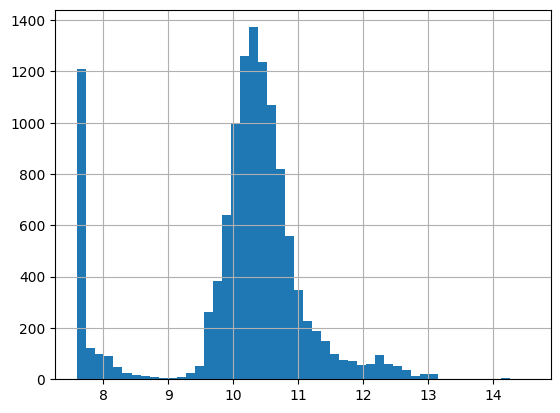

In [21]:
price_logs.hist(bins=50)

<AxesSubplot: xlabel='msrp', ylabel='Count'>

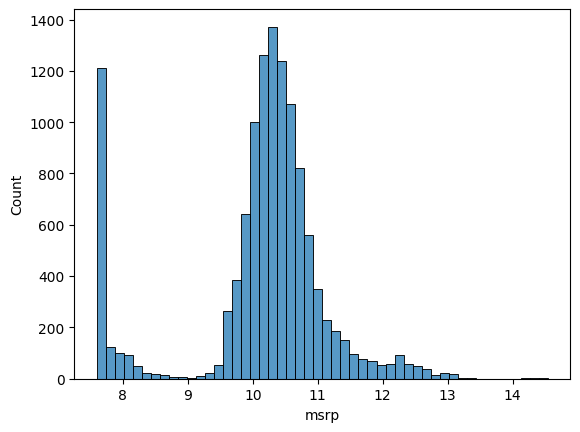

In [22]:
sns.histplot(price_logs, bins=50)

In [23]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

<h1>Setting up the validation framework</h1>

In [24]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [25]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [26]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [27]:
np.arange(n)

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [28]:
idx = np.arange(n)

In [29]:
np.random.seed(2)
np.random.shuffle(idx)

In [30]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]    
df_test = df.iloc[idx[n_train+n_val:]]

In [31]:
df_train 


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [32]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [33]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [34]:
y_train = np.log1p(df_train.msrp.values)

In [35]:
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [36]:
del df_train['msrp']

In [37]:
del df_val['msrp']
del df_test['msrp']

<h1>Linear Regression</h1>

In [38]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [39]:
x1 = [453, 11, 86]

In [40]:
w0 = 0
w = [1, 1, 1]

In [41]:
def linear_regression(xi):
    n = len(xi)
    
    pred = w0
    for j in range(n):
        pred = pred + w[j] * xi[j]
        
    return pred
    

In [42]:
linear_regression(x1)

550

In [43]:
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [44]:
linear_regression(x1)

12.312

In [45]:
np.expm1(12.312)

222347.2221101062

In [46]:
np.log1p(222347.2221101062)

12.312

<h1>Linear Regression Vector Form</h1>

In [47]:
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    for j in range(n):
        res = res + xi[j] * w[j]
        
    return res

In [48]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [49]:
w_new = [w0] + w

In [50]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [51]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [52]:
linear_regression(x1)

12.312

In [53]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x3 = [1, 453, 24, 86]

X = [x1, x2, x3]
X = np.array(x1)
X



array([   1,  148,   24, 1385])

In [54]:
X.dot(w_new)

12.379999999999999

In [55]:
def linear_regression(X):
    return X.dot(w_new)

In [56]:
linear_regression(X)

12.379999999999999

<h1>Training a linear regression model</h1>

In [196]:
X

array([[4., 4., 4.],
       [3., 5., 5.],
       [5., 1., 1.],
       [5., 4., 4.],
       [7., 5., 5.],
       [4., 5., 5.]])

In [229]:
X = [
    [148.00000001, 24, 1385],
    [132, 25, 2031],
    [453, 24, 86],
    [158.00000001, 24, 185],
    [172, 25, 201], 
    [413.00000001, 11, 86],
    [38, 54, 185],
    [142.00000001, 25, 431],
    [453, 31, 86.00000001],
    ]

X = np.array(X)
X

array([[ 148.00000001,   24.        , 1385.        ],
       [ 132.        ,   25.        , 2031.        ],
       [ 453.        ,   24.        ,   86.        ],
       [ 158.00000001,   24.        ,  185.        ],
       [ 172.        ,   25.        ,  201.        ],
       [ 413.00000001,   11.        ,   86.        ],
       [  38.        ,   54.        ,  185.        ],
       [ 142.00000001,   25.        ,  431.        ],
       [ 453.        ,   31.        ,   86.00000001]])

In [219]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [220]:
X = np.column_stack([ones, X])

In [221]:
y = [100, 200, 150, 250, 100, 200, 150, 250, 120]

In [222]:
XTX = X.T.dot(X)
XTX_inv = np.linalg.inv(XTX)
w_full = XTX_inv.dot(X.T).dot(y)

In [223]:
w_full

array([ 2.99701207e+02, -1.96643192e-01, -2.67858895e+00, -2.38864957e-02])

In [224]:
w0 = w_full[0]
w = w_full[1:]

In [225]:
w0, w

(299.7012068110329, array([-0.19664319, -2.67858895, -0.0238865 ]))

In [226]:
def train_linear_regression(X, y):   
    ones = np.ones(X.shape[0])    
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [230]:
#Refresh cell 68 before running this cell
train_linear_regression(X, y)

(299.7012068110329, array([-0.19664319, -2.67858895, -0.0238865 ]))

<h1>Car Price Baseline Model</h1>

In [231]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
num_of_doors_2         int64
num_of_doors_3         int64
num_of_doors_4         int64
dtype: object

In [232]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [233]:
X_train = df_train[base].values

In [234]:
X_train = df_train[base].fillna(0).values

In [235]:
train_linear_regression(X_train, y_train)

(7.92725738807,
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

In [236]:
w0, w = train_linear_regression(X_train, y_train)

In [237]:
y_pred = X_train.dot(w) + w0

In [238]:
y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111])

<AxesSubplot: ylabel='Count'>

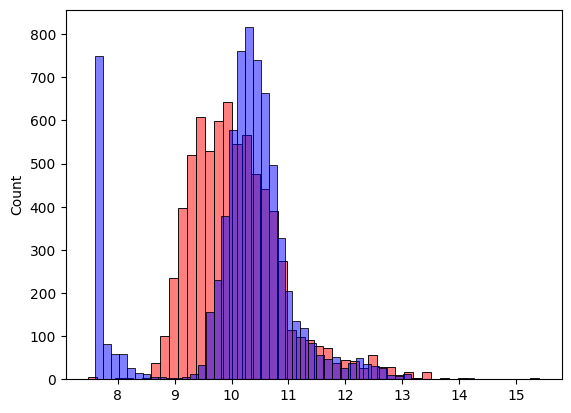

In [239]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

<h1>RMSE</h1>

In [240]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [241]:
rmse(y_train, y_pred)

0.7554192603920132

<h1>Validating the model</h1>

In [242]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [243]:
def prepare_x(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [244]:
XP_train = prepare_x(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.7616530991301591

<h1>Simple Featuring Engineering</h1>

In [245]:
def prepare_x(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = base + ['age']
    
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [246]:
XP_train = prepare_x(df_train)

In [247]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'num_of_doors_2',
       'num_of_doors_3', 'num_of_doors_4'],
      dtype='object')

In [248]:
X_train 

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]])

In [249]:
XP_train = prepare_x(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.7616530991301591

<AxesSubplot: ylabel='Count'>

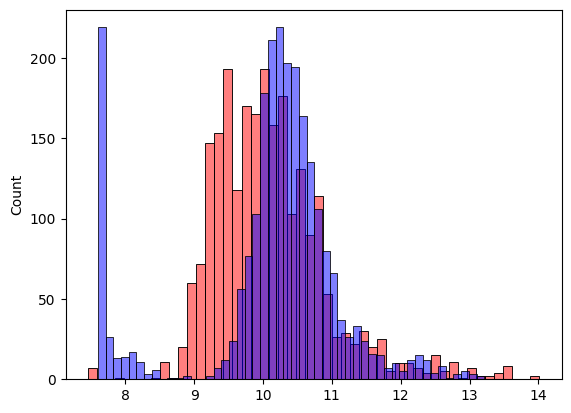

In [250]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

<h1>Categorical Variables</h1>

In [251]:
for v in [2, 3, 4]:
    df_train['num_of_doors_%s' %v] = (df_train['number_of_doors'] == v).astype(int)

In [252]:
def prepare_x(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        df['num_of_doors_%s' %v] = (df['number_of_doors'] == v).astype(int)
        features.append('num_of_doors_%s' %v)
    
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [253]:
df_train 

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_of_doors_2,num_of_doors_3,num_of_doors_4
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,1,0,0
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,0,0,1
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,0,0,1
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,0,1,0
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,1,0,0
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,1,0,0
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,0,0,1
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,0,0,1


In [254]:
prepare_x(df_train)

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]])

In [255]:
XP_train = prepare_x(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.7616530991301591

In [256]:
df.make.nunique()

48

In [257]:
df.make.value_counts().head() 

chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: make, dtype: int64

In [258]:
makes = list(df.make.value_counts().head().index)

In [259]:
def prepare_x(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        df['num_of_doors_%s' %v] = (df['number_of_doors'] == v).astype(int)
        features.append('num_of_doors_%s' %v)
        
    for v in makes:
        df['make_%s' %v] = (df.make == v).astype(int)
        features.append('make_%s' %v)
    
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [260]:
X_train = prepare_x(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.7616530991301591

In [261]:
categorical_variables = [
    'make',
    'engine_fuel_type',
    'transmission_type',
    'driven_wheels',
    'market_category',
    'vehicle_size',
    'vehicle_style'
]

In [262]:
categorical_variables

['make',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [263]:
categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [264]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [265]:
def prepare_x(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        df['num_of_doors_%s' %v] = (df['number_of_doors'] == v).astype(int)
        features.append('num_of_doors_%s' %v)
    
    for c, values in categories.items():     
        for v in makes:
            df['%s_%s' % (c, v)] = (df[c] == v).astype(int)
            features.append('%s_%s' % (c, v))
    
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [266]:
X_train = prepare_x(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.7616530991301591

In [267]:
w0

7.92725738807

In [268]:
w

array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
       -9.06908672e-06])

<h1>Regularization</h1>

In [269]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.0000000001],
]

X = np.array(X)
X

array([[4., 4., 4.],
       [3., 5., 5.],
       [5., 1., 1.],
       [5., 4., 4.],
       [7., 5., 5.],
       [4., 5., 5.]])

In [270]:
y = [1, 2, 3, 1, 2, 3]

In [271]:
XTX = X.T.dot(X)
XTX

array([[140., 111., 111.],
       [111., 108., 108.],
       [111., 108., 108.]])

In [272]:
XTX_inv = np.linalg.inv(XTX)

In [273]:
XTX_inv.dot(X.T).dot(y)

array([ 5.17914730e-01, -8.82187500e+03,  8.82208594e+03])

In [274]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [275]:
XTX = 0.1 * np.eye(3)
XTX

array([[0.1, 0. , 0. ],
       [0. , 0.1, 0. ],
       [0. , 0. , 0.1]])

In [276]:
np.linalg.inv(XTX)

array([[10.,  0.,  0.],
       [ 0., 10.,  0.],
       [ 0.,  0., 10.]])

In [277]:
def train_linear_regression_reg(X, y, r=0.001):   
    ones = np.ones(X.shape[0])    
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [278]:
X_train = prepare_x(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.7616511367099391

<h1>Tuning the model</h1>

In [279]:
for r in [0.0001, 0.001, 0.01, 0.1]:
    X_train = prepare_x(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_x(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    print(r, w0, score)

0.0001 7.927252034953396 0.7616530794713867
0.001 7.927203857232721 0.7616529025738804
0.01 7.926722112527862 0.7616511367099391
0.1 7.921907913389942 0.7616337887793918


In [280]:
r = 0.001
X_train = prepare_x(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

0.7616529025738804

<h1>Using the model</h1>

In [282]:
df_full_train = pd.concat([df_train, df_val])

In [283]:
df_full_train = df_full_train.reset_index(drop=True)

In [284]:
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_of_doors_2,num_of_doors_3,num_of_doors_4
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,1.0,0.0,0.0
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,0.0,0.0,1.0
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,0.0,0.0,1.0
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,0.0,1.0,0.0
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870,NaN,NaN,NaN
9528,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238,NaN,NaN,NaN
9529,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624,NaN,NaN,NaN
9530,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436,NaN,NaN,NaN


In [285]:
X_full_train = prepare_x(df_full_train)

In [286]:
y_full_train = np.concatenate([y_train, y_val])

In [287]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [288]:
w0 

7.884050889144636

In [289]:
X_test = prepare_x(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score



0.734628417914058

In [293]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [294]:
df_smal = pd.DataFrame([car])

In [295]:
prepare_x(df_smal)

array([[ 266.,    6.,   25.,   18., 2031.]])

In [296]:
x_small = prepare_x(df_smal)

In [300]:
y_pred = w0 + x_small.dot(w)
y_pred = y_pred[0]
y_pred

10.169644100550059

In [301]:
np.expm1(y_pred)

26097.786567153194

In [302]:
y_test[20]
np.expm1(y_test[20])

35000.00000000001